In [ ]:
import os
import json
from shapely.geometry import Polygon
from PIL import Image, ImageDraw
import numpy as np
import cv2

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_images = np.load('/content/drive/MyDrive/Segnet IDD Project/Version 5/Prepared Data/train_images.npy')
train_binary_masks = np.load('/content/drive/MyDrive/Segnet IDD Project/Version 5/Prepared Data/train_binary_masks.npy')

print("Training data loaded")

Training data loaded


In [ ]:
train_images.shape

(1732, 216, 384, 3)

In [ ]:
train_binary_masks.shape

(1732, 216, 384)

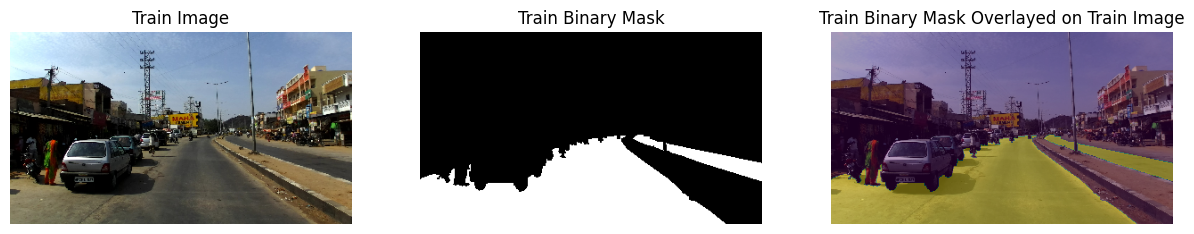

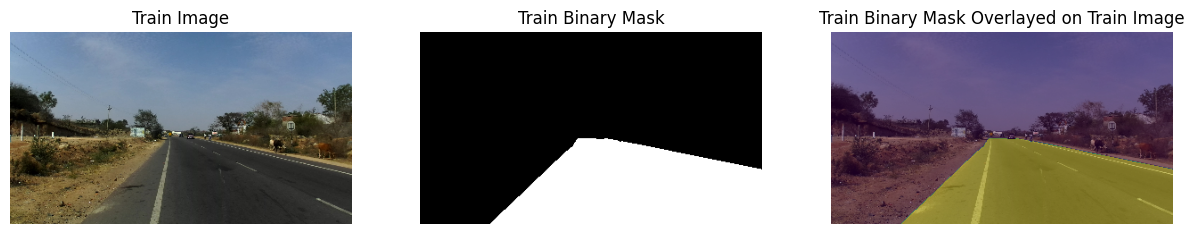

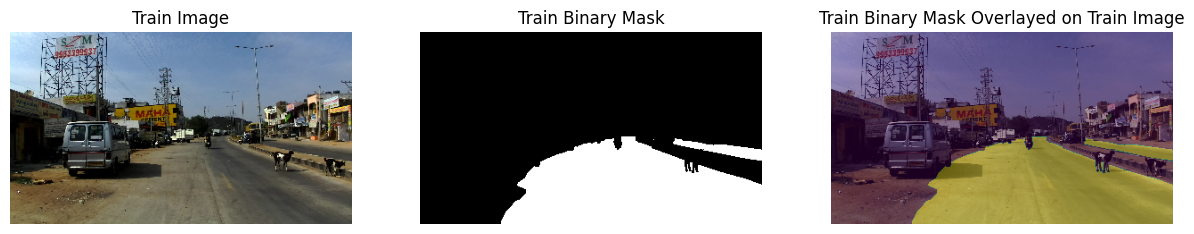

In [ ]:
import matplotlib.pyplot as plt


for index in [0,2,3]:

  plt.figure(figsize=(15,7))

  plt.subplot(1, 3, 1)
  plt.imshow(train_images[index])
  plt.title('Train Image')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(train_binary_masks[index], cmap='gray')
  plt.title('Train Binary Mask')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(train_binary_masks[index])
  plt.imshow(train_images[index] , alpha=0.6)
  plt.title('Train Binary Mask Overlayed on Train Image')
  plt.axis('off')

In [ ]:
# binary_segnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print("Model Compiled")

In [ ]:
val_images = np.load('/content/drive/MyDrive/Segnet IDD Project/Version 5/Prepared Data/val_images.npy')
val_binary_masks = np.load('/content/drive/MyDrive/Segnet IDD Project/Version 5/Prepared Data/val_binary_masks.npy')

print("Validation data loaded")

Validation data loaded


In [ ]:
val_images.shape

(49, 216, 384, 3)

In [ ]:
val_binary_masks.shape

(49, 216, 384)

In [ ]:
np.max(train_images)

1.0

In [ ]:
np.max(train_binary_masks)

1

In [ ]:
np.max(val_images)

1.0

In [ ]:
np.max(val_binary_masks)

1

In [ ]:
from tensorflow.keras.utils import Sequence

class CustomDataGenerator(Sequence):
    def __init__(self, images, masks, batch_size):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, idx):
        batch_images = self.images[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_masks = self.masks[idx * self.batch_size : (idx + 1) * self.batch_size]

        # Implement any necessary preprocessing here

        return batch_images, batch_masks

# Create generators
train_generator = CustomDataGenerator(train_images, train_binary_masks, batch_size=16)
val_generator = CustomDataGenerator(val_images, val_binary_masks, batch_size=1)


In [ ]:
from keras.models import load_model
# Load the trained model
#binary_segnet = load_model('/content/drive/My Drive/Segnet IDD Project/Version 4/binary_segnet_model.h5')
binary_segnet = load_model('/content/drive/MyDrive/Segnet IDD Project/Version 5/binary_segnet_model.h5')
print("Trained model loaded")

Trained model loaded


In [ ]:
for i in range(100):
    # Train the model
    binary_segnet.fit(train_generator, epochs=1, validation_data=val_generator)
    # Save the trained model
    binary_segnet.save('/content/drive/MyDrive/Segnet IDD Project/Version 5/trained_binary_segnet_model.h5')
    print("Trained model saved")

108/108 [==============================] - 45s 405ms/step - loss: 0.3753 - accuracy: 0.8776 - val_loss: 3.3487 - val_accuracy: 0.2199
Trained model saved
108/108 [==============================] - 43s 395ms/step - loss: 0.2347 - accuracy: 0.9199 - val_loss: 2.0508 - val_accuracy: 0.2214
Trained model saved
108/108 [==============================] - 43s 395ms/step - loss: 0.1947 - accuracy: 0.9287 - val_loss: 1.1748 - val_accuracy: 0.7039
Trained model saved
108/108 [==============================] - 43s 396ms/step - loss: 0.1853 - accuracy: 0.9295 - val_loss: 0.7162 - val_accuracy: 0.7253
Trained model saved
108/108 [==============================] - 43s 395ms/step - loss: 0.1830 - accuracy: 0.9299 - val_loss: 0.1972 - val_accuracy: 0.9262
Trained model saved
108/108 [==============================] - 43s 396ms/step - loss: 0.1767 - accuracy: 0.9313 - val_loss: 0.1978 - val_accuracy: 0.9076
Trained model saved
108/108 [==============================] - 43s 396ms/step - loss: 0.1645 - a

KeyboardInterrupt: 